In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as co
import mpmath as mp
import scipy as sp

Tworzenie obiektów, wpierw o delcie > 0.

In [57]:
G1 = co.tf([0,1],[1,4,3])
G2 = co.tf([0,1],[1,3,10])

Tworzenie obiektów o delcie = 0.

In [9]:
G3 = co.tf([0,1],[1,4,4])
G4 = co.tf([0,1],[1,2,1])

Tworzenie obiektów o delcie < 0.

In [68]:
G5 = co.tf([0,1],[1,1,9])
G6 = co.tf([0,1],[1,2,32])

Tworzenie odpowiedzi skokowych korzystając z funkcji z biblioteki control.

In [69]:
t=np.linspace(0,15,1000)
t0=np.linspace(0,8,1000)

t1, y1=co.step_response(G1,t)
t1, y2=co.step_response(G2,t)
t1, y3=co.step_response(G3,t)
t1, y4=co.step_response(G4,t)
t1, y5=co.step_response(G5,t)
t1, y6=co.step_response(G6,t)

t2, y7=co.step_response(G5,t0)

In [14]:
plt.rcParams["figure.figsize"] = (12,10) #zmiana parametru odpowiadającego za wielkość wykresów

Wykresy odpowiedzi skokowej dla układu o delcie > 0.

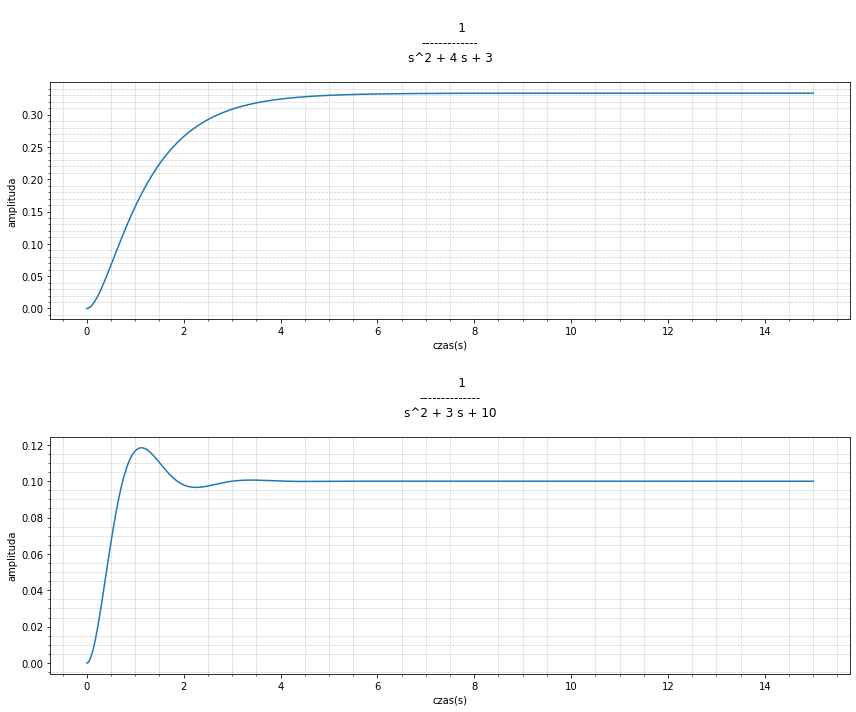

In [62]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(t1,y1, 'tab:blue')
axs[0].set_title(G1)
axs[0].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs[0].minorticks_on()
axs[0].set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()

axs[1].plot(t1,y2, 'tab:blue')
axs[1].set_title(G2)
axs[1].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs[1].minorticks_on()
axs[1].set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()


for ax in axs.flat:
    ax.set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()



Wykresy odpowiedzi skokowej dla układu o delcie = 0.

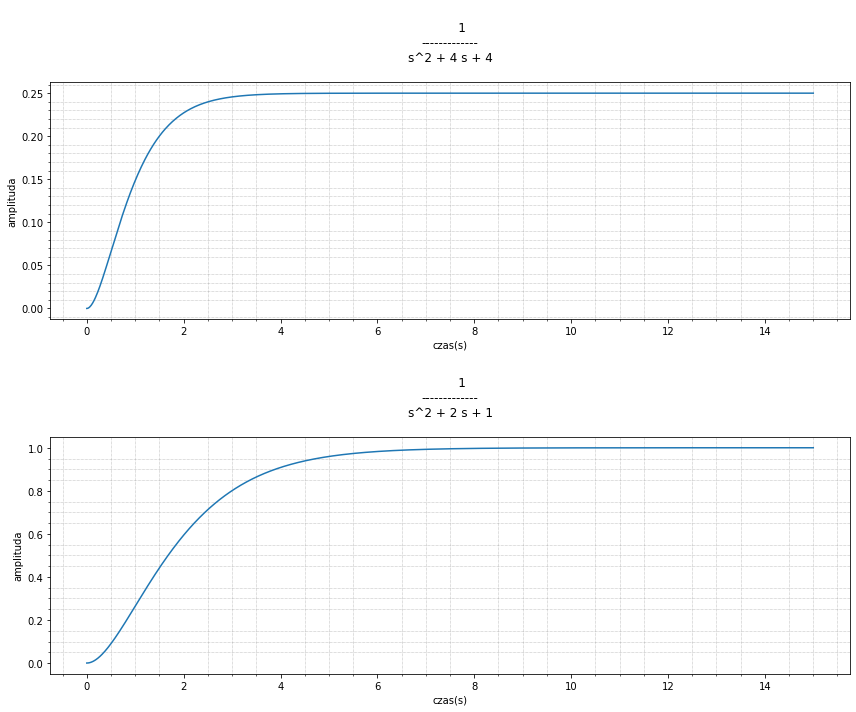

In [64]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(t1,y3, 'tab:blue')
axs[0].set_title(G3)
axs[0].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs[0].minorticks_on()
axs[0].set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()

axs[1].plot(t1,y4, 'tab:blue')
axs[1].set_title(G4)
axs[1].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs[1].minorticks_on()
axs[1].set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()


for ax in axs.flat:
    ax.set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()



Wykresy odpowiedzi skokowej dla układu o delcie < 0.

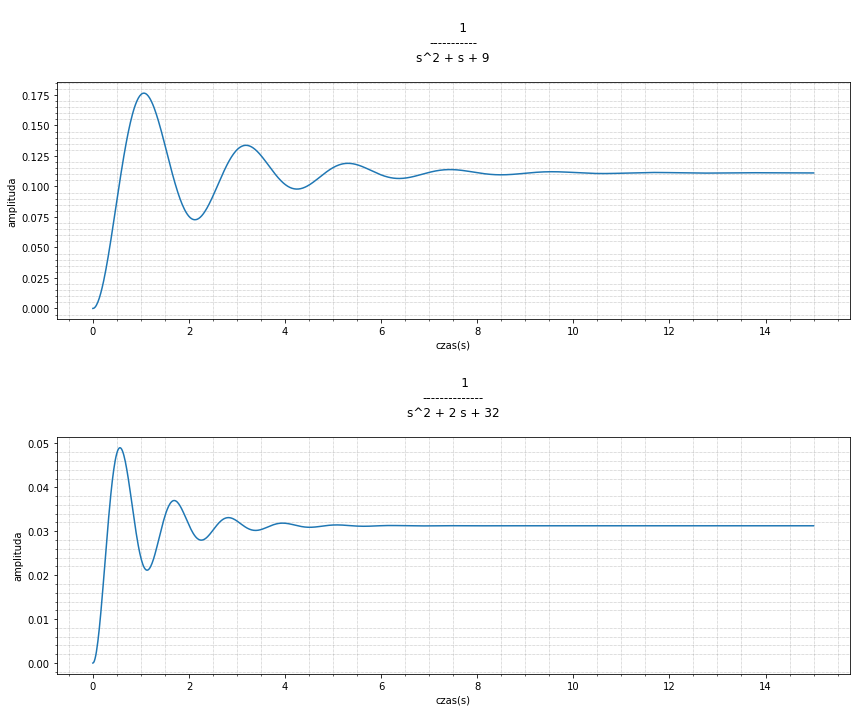

In [70]:
fig, axs = plt.subplots(2, 1)

axs[0].plot(t1,y5, 'tab:blue')
axs[0].set_title(G5)
axs[0].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs[0].minorticks_on()
axs[0].set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()

axs[1].plot(t1,y6, 'tab:blue')
axs[1].set_title(G6)
axs[1].grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs[1].minorticks_on()
axs[1].set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()


for ax in axs.flat:
    ax.set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()



Zadanie 2. Mając wykres i wzór $\frac{1}{s^2+as+b}$, wpierw należy wyznaczyć współrzędne kilku punktów należących do wykresu odpowiedzi skokowej. Punkty powinny znajdować się w wierzchołkach oscylacji.

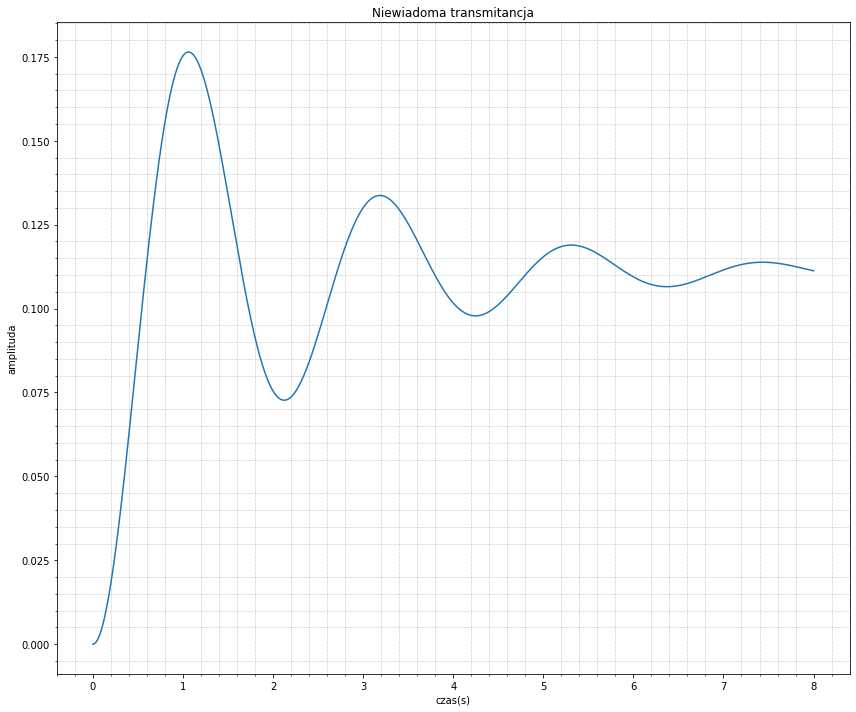

In [34]:
fig, axs = plt.subplots()

axs.plot(t2,y7, 'tab:blue')
axs.set_title("Niewiadoma transmitancja")
axs.grid(which='minor', color='grey', linestyle=':', linewidth=0.5)
axs.minorticks_on()
axs.set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()

ax.set(xlabel='czas(s)', ylabel='amplituda' )
fig.tight_layout()


Należy stworzyć tabelę danych pomiarowych, użyję w tym celu tabeli numpy.

In [35]:
x_arr=np.array([1.05,3.19,5.3,7.4])
y_arr=np.array([0.176,0.134,0.119,0.114])

Następnie dopasowujemy eksponentę do wybranych punktów.

In [38]:
def monoExp(x, m, t, b):
    return m * np.exp(-t * x) + b

In [49]:
params, cv = sp.optimize.curve_fit(monoExp, x_arr, y_arr)
m, t, B = params
print(f"Y = {m} * e^(-{t} * t) + {B}")
b=1/B
print(f"b = {b} ")

Y = 0.10844930505976318 * e^(-0.4863878962052368 * t) + 0.1109350432784328
b = 9.014284129228017 


Wiedząc, że granica $\lim_{s \to 0} \frac{1}{s^2+as+b}=\frac{1}{b} $, równa jest wyrazowi wolnemu eksponenty, można wyznaczyć współczynnik **b**. Stąd wiemy, że  $\frac{1}{b}=0.1109350432784328$, zatem $b=\frac{1}{0.1109350432784328}=9.014284129228017 $ $ \approx 9 $.

Można dokonać wyznaczenia parametru **a**, za pomocą funkcji $y(t)=Ae^{\sigma t}sin({\omega t + \phi})$

Wiemy też, że $\sigma=Re{(\lambda_{1,2})}=-\frac{a}{2}$

Zestaw danych zawierał współrzędne wierzchołków, stąd możemy zastąpić sinusa jedynką.

Stąd: <p>$e^{-\frac{at}{2}}=e^{-0.4863878962052368 t}$<p>
    $-\frac{at}{2}=-0.4863878962052368 t$<p>
    $a=2*0.4863878962052368$<p>
    $a=0.9727757924104736$ <p>
    $a\approx 1$<p>
Zatem, wyznaczona transmitancja obiektu to $\frac{1}{s^2+s+9}$
    

Wnioski:
- oscylacje wystepują gdy występują bieguny zespolone
- za pomocą wykresu i postaci ogólnej transmitancji jesteśmy w stanie wyznaczyć parametry obiektu
- przykładem rzeczywistego obiektu o transmitancji w tej postaci może być układ RLC